In [1]:
# import seaborn as sns
import matplotlib.pyplot as plt
from foof.util import create_psd
%matplotlib inline

In [2]:
# ING
%run ../bin/ei.py ../data/test/test_ing \
    -t 1 --stim 0.25 --rate 30 --period 1 \
    --I_e 0.1 --I_i 0.8 --I_i_sigma 0.0 --I_e_sigma 0.0 \
    --w_e 2.0 --w_ee 0.0 --w_ii 0.5 \
    --w_ei .1 --w_ie 1.2 

WARNING    The 'pre' keyword is deprecated, use 'on_pre' instead. [brian2.synapses.synapses.deprecated_pre]
INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.17s, trying other methods took 1.98s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.14s, trying other methods took 1.45s). [brian2.stateupdaters.base.method_choice]


Trial 0
Starting simulation at t=0. s for a duration of 1. s
149.02 ms (14%) simulated in 10s, estimated 57s remaining.
292.98 ms (29%) simulated in 20s, estimated 48s remaining.
0.43869 s (43%) simulated in 30s, estimated 38s remaining.
0.59045 s (59%) simulated in 40s, estimated 28s remaining.
0.74069 s (74%) simulated in 50s, estimated 18s remaining.
0.89421 s (89%) simulated in 1m 0s, estimated 7s remaining.
1. s (100%) simulated in 1m 6s
Saving results


WARNING    /home/ejp/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
 [py.warnings]
  warnings.warn("No labelled objects found. "



AttributeError: 'NoneType' object has no attribute 't'

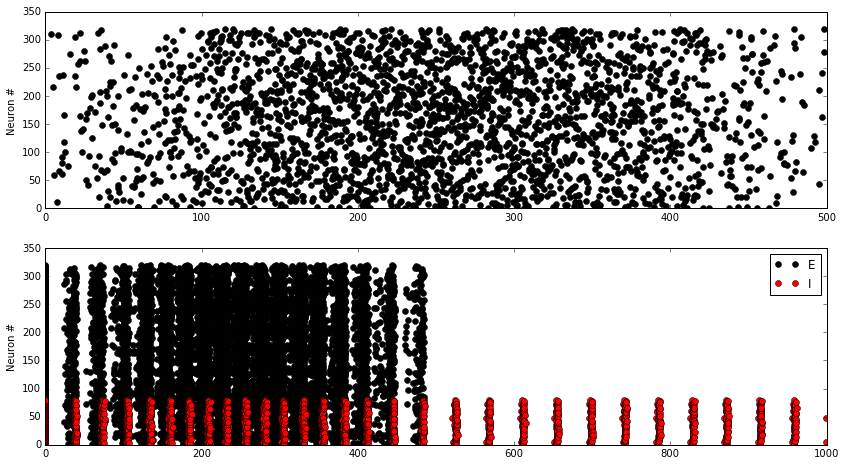

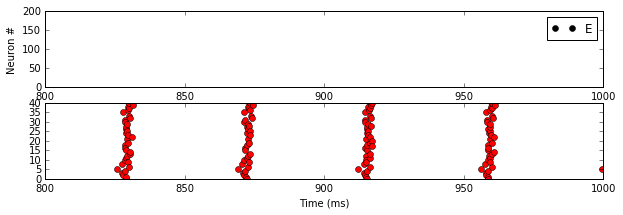

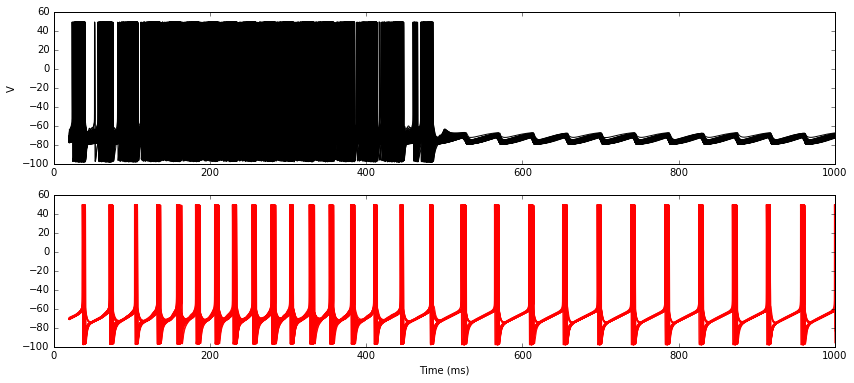

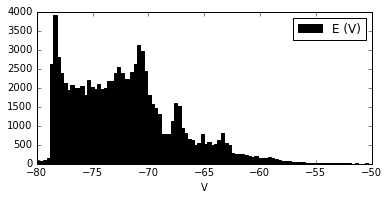

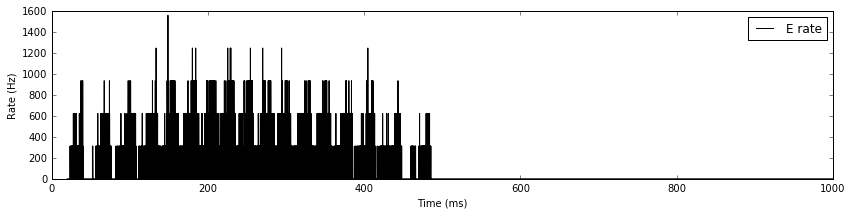

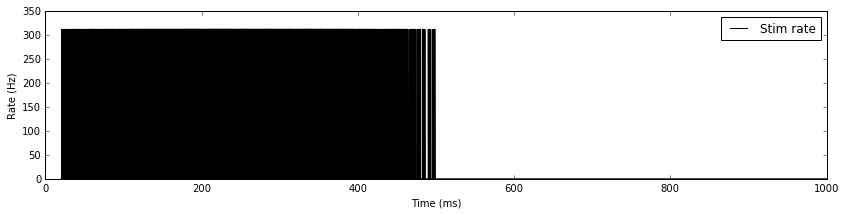

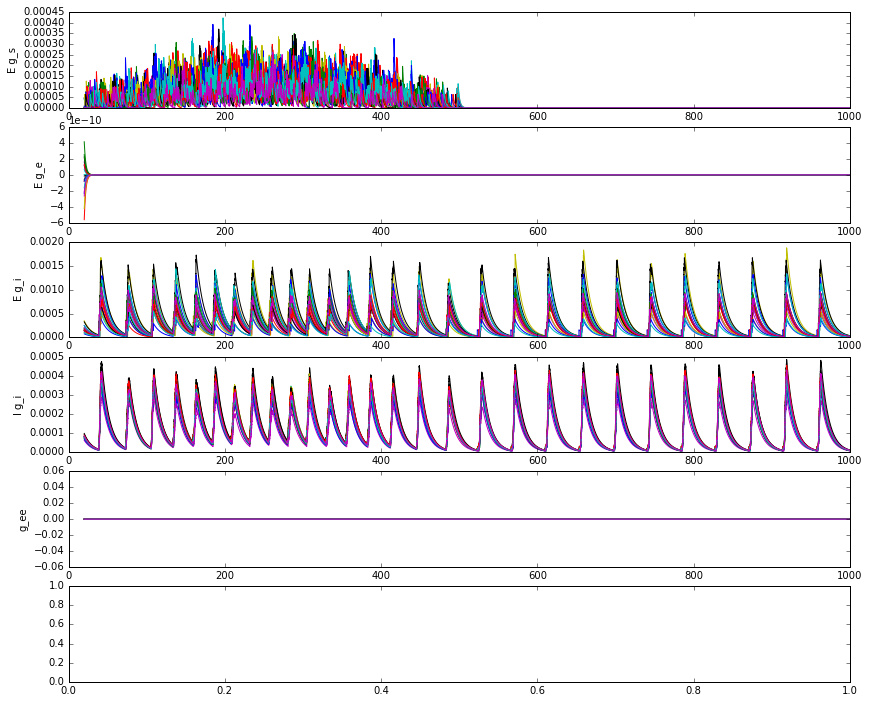

In [3]:
# To plot
trial = 0
period = 1
if trial == 0:
    t_min = 0
else:
    t_min = period * trial
t_max = t_min + period

# Unpack
spikes_e = result['spikes_e']
spikes_stim = result['spikes_stim']
spikes_i = result['spikes_i']
pop_e = result['pop_e']
pop_stim = result['pop_stim']
traces_e = result['traces_e']
traces_i = result['traces_i']
weights = result['weights_e']

t = 2000

# ------------------------------------------------------------
# Raster full
figure(figsize=(14, 12))
subplot(311)
plot(spikes_stim.t/ms, spikes_stim.i, 'o', label='', color='k')
# xlim(t_min * 1000, t_max * 1000)
ylabel("Neuron #")
legend()

subplot(312)
plot(spikes_e.t/ms, spikes_e.i, 'o', label='E', color='k')
plot(spikes_i.t/ms, spikes_i.i, 'o', label='I', color='r')
# xlim(t_min * 1000, t_max * 1000)
ylabel("Neuron #")
legend()


# Raster zoom
figure(figsize=(10, 3))
subplot(211)
plot(spikes_e.t/ms, spikes_e.i, 'o', label='E', color='k')
ylabel("Neuron #")
ylim(0, 200)
xlim(t_max * 1000 - 200, t_max * 1000)
legend()

subplot(212)
plot(spikes_i.t/ms, spikes_i.i, 'o', label='I', color='r')
xlabel("Time (ms)")
ylim(0, 40)
xlim(t_max * 1000 - 200, t_max * 1000)

# ------------------------------------------------------------
# V 
tn = 2000
figure(figsize=(14, 6))
subplot(211)
plot(traces_e.t[tn:]/ms, traces_e.V[:, tn:].T/mvolt, color='k')
# ylim(-90, -50)
ylabel("V")
legend()

subplot(212)
plot(traces_i.t[tn:]/ms, traces_i.V[:, tn:].T/mvolt, color='r')
xlabel("Time (ms)")
legend()

# V hist
figure(figsize=(6,6))
subplot(211)
hist(traces_e.V[0][tn:]/mvolt, label='E (V)', color='k', bins=100, range=(-80, -50))
xlabel("V")
legend()

# ------------------------------------------------------------
# E rate
figure(figsize=(14, 3))
plot(pop_e.t[tn:]/ms, pop_e.rate[tn:]/Hz, color='k', label='E rate')
ylabel('Rate (Hz)')
xlabel("Time (ms)")
legend()

figure(figsize=(14, 3))
plot(pop_stim.t[tn:]/ms, pop_stim.rate[tn:]/Hz, color='k', label='Stim rate')
ylabel('Rate (Hz)')
xlabel("Time (ms)")
legend()

# ------------------------------------------------------------
figure(figsize=(14, 12))
subplot(611)
plot(traces_e.t[tn:]/ms, traces_e.g_s[1:20, tn:].T, label='E (g_s)')
ylabel("E g_s")

subplot(612)
plot(traces_e.t[tn:]/ms, traces_e.g_e[1:20, tn:].T, label='E (g_e)')
ylabel("E g_e")

subplot(613)
plot(traces_e.t[tn:]/ms, traces_e.g_i[1:20, tn:].T, label='E (g_i)')
ylabel("E g_i")

subplot(614)
plot(traces_i.t[tn:]/ms, traces_i.g_i[1:20, tn:].T, label='I (g_i)')
ylabel("I g_i")
# legend(loc='best')

subplot(615)
plot(traces_e.t[tn:]/ms, traces_e.g_ee[1:20, tn:].T, label='E (g_ee)')
ylabel("g_ee")
xlabel("Time (ms)")

subplot(616)
plot(weights.t[tn:]/ms, weights.w_stdp[1:20, tn:].T, label='w_stdp')
ylabel("Del W")
xlabel("Time (ms)")

# # ------------------------------------------------------------
# # Spectra
# lfp = (np.abs(traces_e.g_s.sum(0)) + np.abs(traces_e.g_ee.sum(0)) + np.abs(traces_e.g_i.sum(0)))
# lfp = lfp[1000:]  # Drop initial spike

# figure(figsize=(6,6))
# subplot(211)
# plot(traces_i.t[1000:]/ms, lfp, color='k',  label='LFP')
# xlabel("Time (ms)")
# ylabel("Sim. LFP (msiemens)")

# subplot(212)
# fs, spec = create_psd(lfp, 100000)
# plot(fs[:60], spec[:60], color='k')
# xlabel("Freq (Hz)") 
# ylabel("PSD")

# -----------
# stdp
figure(figsize=(8,4))
subplot(121)
plt.hist(result['weights_e'].w_stdp[:,1-1], color='k', bins=50);
plt.ylabel("Intial w_stdp")
subplot(122)
plt.hist(result['weights_e'].w_stdp[:,50000-1], color='k', bins=50);
plt.ylim(0,1000)
plt.ylabel("Final w_stdp")

In [ ]:
# Ping
%run ../bin/ei.py ../data/test/test_ping \
    -t 10 --stim 0.25 --rate 30 --period 0.5 \
    --I_e 0.0 --I_i 0.1 --I_i_sigma 0.0 --I_e_sigma 0.0 \
    --w_e 2.0 --w_ee 0.1 --w_ii 0.5 \
    --w_ei .5 --w_ie 1.2 --stdp --balanced

In [ ]:
trial = 19
period = 0.5
if trial == 0:
    t_min = 0
else:
    t_min = period * trial
t_max = t_min + period

# Unpack
spikes_e = result['spikes_e']
spikes_stim = result['spikes_stim']
spikes_i = result['spikes_i']
pop_e = result['pop_e']
pop_stim = result['pop_stim']
traces_e = result['traces_e']
traces_i = result['traces_i']
weights = result['weights_e']

t = 2000

# ------------------------------------------------------------
# Raster full
figure(figsize=(14, 12))
subplot(311)
plot(spikes_stim.t/ms, spikes_stim.i, 'o', label='', color='k')
xlim(t_min * 1000, t_max * 1000)
ylabel("Neuron #")
legend()

subplot(312)
plot(spikes_e.t/ms, spikes_e.i, 'o', label='E', color='k')
plot(spikes_i.t/ms, spikes_i.i, 'o', label='I', color='r')
xlim(t_min * 1000, t_max * 1000)
ylabel("Neuron #")
legend()


# Raster zoom
figure(figsize=(10, 3))
subplot(211)
plot(spikes_e.t/ms, spikes_e.i, 'o', label='E', color='k')
ylabel("Neuron #")
ylim(0, 200)
xlim(t_max * 1000 - 200, t_max * 1000)
legend()

subplot(212)
plot(spikes_i.t/ms, spikes_i.i, 'o', label='I', color='r')
xlabel("Time (ms)")
ylim(0, 40)
xlim(t_max * 1000 - 200, t_max * 1000)

# ------------------------------------------------------------
# V 
tn = 2000
figure(figsize=(14, 6))
subplot(211)
plot(traces_e.t[tn:]/ms, traces_e.V[0, tn:].T/mvolt, color='k')
# ylim(-90, -50)
ylabel("V")
legend()

subplot(212)
plot(traces_i.t[tn:]/ms, traces_i.V[:, tn:].T/mvolt, color='r')
xlabel("Time (ms)")
legend()

# V hist
figure(figsize=(6,6))
subplot(211)
hist(traces_e.V[0][tn:]/mvolt, label='E (V)', color='k', bins=100, range=(-80, -50))
xlabel("V")
legend()

# ------------------------------------------------------------
# E rate
figure(figsize=(14, 3))
plot(pop_e.t[tn:]/ms, pop_e.rate[tn:]/Hz, color='k', label='E rate')
ylabel('Rate (Hz)')
xlabel("Time (ms)")
legend()

figure(figsize=(14, 3))
plot(pop_stim.t[tn:]/ms, pop_stim.rate[tn:]/Hz, color='k', label='Stim rate')
ylabel('Rate (Hz)')
xlabel("Time (ms)")
legend()

# ------------------------------------------------------------
figure(figsize=(14, 12))
subplot(611)
plot(traces_e.t[tn:]/ms, traces_e.g_s[1:20, tn:].T, label='E (g_s)')
ylabel("E g_s")

subplot(612)
plot(traces_e.t[tn:]/ms, traces_e.g_e[1:20, tn:].T, label='E (g_e)')
ylabel("E g_e")

subplot(613)
plot(traces_e.t[tn:]/ms, traces_e.g_i[1:20, tn:].T, label='E (g_i)')
ylabel("E g_i")

subplot(614)
plot(traces_i.t[tn:]/ms, traces_i.g_i[1:20, tn:].T, label='I (g_i)')
ylabel("I g_i")
# legend(loc='best')

subplot(615)
plot(traces_e.t[tn:]/ms, traces_e.g_ee[1:20, tn:].T, label='E (g_ee)')
ylabel("g_ee")
xlabel("Time (ms)")

subplot(616)
plot(weights.t[tn:]/ms, weights.w_stdp[1:20, tn:].T, label='w_stdp')
ylabel("Del W")
xlabel("Time (ms)")

# # ------------------------------------------------------------
# # Spectra
# lfp = (np.abs(traces_e.g_s.sum(0)) + np.abs(traces_e.g_ee.sum(0)) + np.abs(traces_e.g_i.sum(0)))
# lfp = lfp[1000:]  # Drop initial spike

# figure(figsize=(6,6))
# subplot(211)
# plot(traces_i.t[1000:]/ms, lfp, color='k',  label='LFP')
# xlabel("Time (ms)")
# ylabel("Sim. LFP (msiemens)")

# subplot(212)
# fs, spec = create_psd(lfp, 100000)
# plot(fs[:60], spec[:60], color='k')
# xlabel("Freq (Hz)") 
# ylabel("PSD")

# -----------
# stdp
figure(figsize=(8,4))
subplot(121)
plt.hist(result['weights_e'].w_stdp[:,1-1], color='k', bins=50);
plt.ylabel("Intial w_stdp")
subplot(122)
plt.hist(result['weights_e'].w_stdp[:,50000-1], color='k', bins=50);
plt.ylim(0,1000)
plt.ylabel("Final w_stdp")